# Import libraries

In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from random import shuffle
import random

In [2]:
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Define constants & methods

In [ ]:
%%javascript
var kernel = IPython.notebook.kernel;
var body = document.body,  
    attribs = body.attributes;
var command = "version_name = " + "'"+attribs['data-notebook-name'].value+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [ ]:
version_name = version_name.split('.')[0]

In [ ]:
save_model_path = "/home/sch17/Documents/fyp/notebooks/MobileNet/output/"+version_name
save_history_path = "/home/sch17/Documents/fyp/notebooks/MobileNet/output/"+version_name

In [ ]:
save_history_path

'/home/sch17/Documents/fyp/notebooks/MobileNet/output/MobileNetV2_dasa_%28V9a%29_kcross'

In [ ]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)

input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

In [ ]:
# plot graphs for training and valdation data
def plot_graphs(history):
  acc = [0.] + history.history['accuracy']
  val_acc = [0.] + history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(acc,'o-g', label='Training Accuracy')
  plt.plot(val_acc, 'o-r',label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('Accuracy')
  plt.ylim([min(plt.ylim()),1])
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, 'o-g', label='Training Loss')
  plt.plot(val_loss, 'o-r',label='Validation Loss',color='red')
  plt.legend(loc='upper right')
  plt.ylabel('Cross Entropy')
  plt.ylim([0,3.0])
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()

In [ ]:
# get accuray of test data
def getModelAccuracy(dataframe):
    sample_test = dataframe
    correctPredictions = 0

    correctNormalPred = 0
    correctCovidPred = 0
    correctPneumoniaPred = 0

    totalNormalPred = 0
    totalCovidPred = 0
    totalPneumoniaPred = 0

    for index, row in sample_test.iterrows():

        filename = row['filename']
        prediction = row['category']

        # img = load_img(path + 'CrossValidationDataset\\' + filename, target_size=IMAGE_SIZE)

        if (path +'/normal') in filename:

            if prediction == 0:
                correctPredictions += 1
                correctNormalPred += 1

            totalNormalPred += 1

        if (path + '/covid') in filename:

            if prediction == 1: 
                correctPredictions += 1
                correctCovidPred += 1

            totalCovidPred += 1

        if (path + '/pneumonia') in filename:

            if prediction == 2: 
                correctPredictions += 1
                correctPneumoniaPred += 1

            totalPneumoniaPred += 1
            
    print('Model Accuracy:', "{:.2%}".format(correctPredictions / test_df.shape[0]))
    print('Correct Predictions:', correctPredictions, 'Total Predictions:', test_df.shape[0])

    print('\nNormal Predictions:', correctNormalPred, 'Accuracy', "{:.2%}".format(correctNormalPred /  totalNormalPred))
    print('Covid Predictions:', correctCovidPred, 'Accuracy', "{:.2%}".format(correctCovidPred /  totalCovidPred))
    print('Pneumonia Predictions:', correctPneumoniaPred, 'Accuracy', "{:.2%}".format(correctPneumoniaPred / totalPneumoniaPred))
    
    return (correctPredictions / test_df.shape[0]) * 100

In [ ]:
# plot confusion matrix
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import itertools

# np_config.enable_numpy_behavior()
    
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion Matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Oranges')

    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    # thresh = np.max(cm) / 1.5 if normalize else np.max(cm) / 2

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    



In [ ]:
path = "/home/sch17/Documents/fyp/dataset"

# Model






In [ ]:
def CNNModel():
  init_model = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top=False, input_shape=input_shape)
  x = init_model.output
  x = tfl.GlobalAveragePooling2D()(x)
  x = tfl.Dropout(0.2)(x)
  x = tfl.Dense(3, activation='softmax')(x) # 3 units
  new_model = Model(inputs=init_model.input, outputs=x)
  # without freezing layers - without getting pre-trained parameters

  return new_model

In [ ]:
test_model = CNNModel()

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
test_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

# Create dataframe

In [ ]:
directories = ['/normal']
categories = []
filenames = []
    
files = os.listdir(path + directories[0])

for img in files:
    categories.append(0)
    filenames.append(path+directories[0]+"/"+img)

files.sort()
df_NORMAL = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

print(df_NORMAL.shape[0])
df_NORMAL.head()

directories = ['/pneumonia']
categories = []
filenames = []
    
files = os.listdir(path + directories[0])

for img in files:
    categories.append(2)
    filenames.append(path+directories[0]+"/"+img)

files.sort()
df_PNEUMONIA = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

print(df_PNEUMONIA.shape[0])
df_PNEUMONIA.head()

directories = ['/covid']
categories = []
filenames = []
    
files = os.listdir(path + directories[0])

for img in files:
    categories.append(1)
    filenames.append(path+directories[0]+"/"+img)

files.sort()
df_COVID = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

print(df_COVID.shape[0])
df_COVID.head()


1583
4273
3616


,filename,category
0,/home/sch17/Documents/fyp/dataset/covid/COVID-...,1
1,/home/sch17/Documents/fyp/dataset/covid/COVID-...,1
2,/home/sch17/Documents/fyp/dataset/covid/COVID-...,1
3,/home/sch17/Documents/fyp/dataset/covid/COVID-...,1
4,/home/sch17/Documents/fyp/dataset/covid/COVID-...,1


In [ ]:
pd.options.display.max_colwidth = 100

In [ ]:
df = pd.concat([df_NORMAL, df_PNEUMONIA, df_COVID])


In [ ]:
# shuffle data
df = df.sample(frac=1).reset_index(drop = True)
df

,filename,category
0,/home/sch17/Documents/fyp/dataset/pneumonia/person351_bacteria_1620.jpeg,2
1,/home/sch17/Documents/fyp/dataset/pneumonia/person388_virus_775.jpeg,2
2,/home/sch17/Documents/fyp/dataset/covid/COVID-2162.png,1
3,/home/sch17/Documents/fyp/dataset/covid/COVID-853.png,1
4,/home/sch17/Documents/fyp/dataset/pneumonia/person258_bacteria_1208.jpeg,2
...,...,...
9467,/home/sch17/Documents/fyp/dataset/pneumonia/person1619_bacteria_4266.jpeg,2
9468,/home/sch17/Documents/fyp/dataset/normal/NORMAL2-IM-0275-0001.jpeg,0
9469,/home/sch17/Documents/fyp/dataset/pneumonia/person992_bacteria_2919.jpeg,2
9470,/home/sch17/Documents/fyp/dataset/pneumonia/person487_bacteria_2059.jpeg,2


<AxesSubplot:>

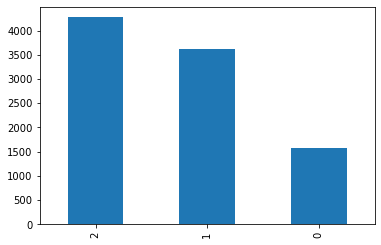

In [ ]:
df['category'].value_counts().plot.bar()

train/val/test split - 60% | 20% | 20%

# K cross

Found 5682 validated image filenames belonging to 3 classes.
Found 1895 validated image filenames belonging to 3 classes.
------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/40
178/178 [==============================] - 363s 2s/step - loss: 0.1366 - accuracy: 0.9502 - val_loss: 0.2971 - val_accuracy: 0.8707

Epoch 00001: val_loss improved from inf to 0.29707, saving model to /home/sch17/Documents/fyp/notebooks/MobileNet/output/MobileNetV2_dasa_%28V9a%29_kcross_0.h5


/home/sch17/anaconda3/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/40
178/178 [==============================] - 338s 2s/step - loss: 0.0743 - accuracy: 0.9757 - val_loss: 1.0315 - val_accuracy: 0.6760

Epoch 00002: val_loss did not improve from 0.29707
Epoch 3/40
178/178 [==============================] - 338s 2s/step - loss: 0.0575 - accuracy: 0.9794 - val_loss: 0.4408 - val_accuracy: 0.8649

Epoch 00003: val_loss did not improve from 0.29707
Epoch 4/40
178/178 [==============================] - 340s 2s/step - loss: 0.0417 - accuracy: 0.9859 - val_loss: 0.3972 - val_accuracy: 0.8908

Epoch 00004: val_loss did not improve from 0.29707
Epoch 5/40
178/178 [==============================] - 337s 2s/step - loss: 0.0321 - accuracy: 0.9907 - val_loss: 0.6414 - val_accuracy: 0.8818

Epoch 00005: val_loss did not improve from 0.29707
Epoch 6/40
178/178 [==============================] - 325s 2s/step - loss: 0.0316 - accuracy: 0.9896 - val_loss: 0.3072 - val_accuracy: 0.9309

Epoch 00006: val_loss did not improve from 0.29707

Epoch 00006: ReduceLROnP

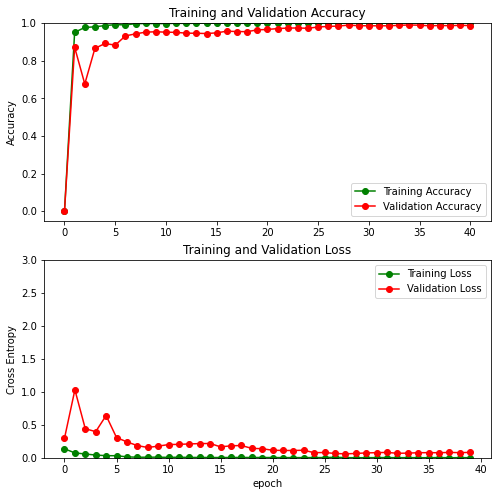

Found 1895 validated image filenames.
Model Accuracy: 98.36%
Correct Predictions: 1864 Total Predictions: 1895

Normal Predictions: 307 Accuracy 96.24%
Covid Predictions: 703 Accuracy 100.00%
Pneumonia Predictions: 854 Accuracy 97.82%


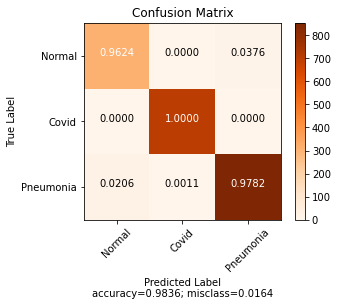

              precision    recall  f1-score   support

      Normal       0.94      0.96      0.95       319
       Covid       1.00      1.00      1.00       703
   Pneumonia       0.99      0.98      0.98       873

    accuracy                           0.98      1895
   macro avg       0.98      0.98      0.98      1895
weighted avg       0.98      0.98      0.98      1895

Precision: 0.9764460390456349
Recall: 0.9802061376892518
F1 : 0.978293026679678
[[307   0  12]
 [  0 703   0]
 [ 18   1 854]]
Found 5682 validated image filenames belonging to 3 classes.
Found 1895 validated image filenames belonging to 3 classes.
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/40
178/178 [==============================] - 297s 2s/step - loss: 0.1573 - accuracy: 0.9446 - val_loss: 0.7245 - val_accuracy: 0.7974

Epoch 00001: val_loss improved from inf to 0.72453, saving model to /home/sch17/Documents/fyp/notebooks/MobileNet/output/MobileNet

/home/sch17/anaconda3/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/40
178/178 [==============================] - 300s 2s/step - loss: 0.0774 - accuracy: 0.9717 - val_loss: 1.0975 - val_accuracy: 0.7773

Epoch 00002: val_loss did not improve from 0.72453
Epoch 3/40
178/178 [==============================] - 292s 2s/step - loss: 0.0599 - accuracy: 0.9791 - val_loss: 1.5207 - val_accuracy: 0.8195

Epoch 00003: val_loss did not improve from 0.72453
Epoch 4/40
178/178 [==============================] - 285s 2s/step - loss: 0.0446 - accuracy: 0.9819 - val_loss: 0.9003 - val_accuracy: 0.8470

Epoch 00004: val_loss did not improve from 0.72453
Epoch 5/40
178/178 [==============================] - 289s 2s/step - loss: 0.0360 - accuracy: 0.9873 - val_loss: 1.2269 - val_accuracy: 0.8401

Epoch 00005: val_loss did not improve from 0.72453
Epoch 6/40
178/178 [==============================] - 287s 2s/step - loss: 0.0246 - accuracy: 0.9910 - val_loss: 1.7806 - val_accuracy: 0.8427

Epoch 00006: val_loss did not improve from 0.72453

Epoch 00006: ReduceLROnP

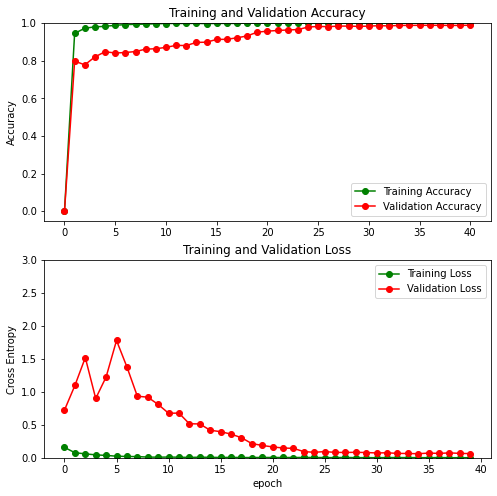

Found 1895 validated image filenames.
Model Accuracy: 98.47%
Correct Predictions: 1866 Total Predictions: 1895

Normal Predictions: 310 Accuracy 93.66%
Covid Predictions: 722 Accuracy 99.86%
Pneumonia Predictions: 834 Accuracy 99.17%


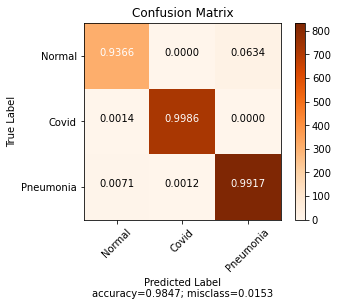

              precision    recall  f1-score   support

      Normal       0.98      0.94      0.96       331
       Covid       1.00      1.00      1.00       723
   Pneumonia       0.98      0.99      0.98       841

    accuracy                           0.98      1895
   macro avg       0.98      0.98      0.98      1895
weighted avg       0.98      0.98      0.98      1895

Precision: 0.9839911505664433
Recall: 0.9756164469598559
F1 : 0.9796325212100241
[[310   0  21]
 [  1 722   0]
 [  6   1 834]]
Found 5683 validated image filenames belonging to 3 classes.
Found 1895 validated image filenames belonging to 3 classes.
------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/40
178/178 [==============================] - 270s 1s/step - loss: 0.1402 - accuracy: 0.9490 - val_loss: 1.9029 - val_accuracy: 0.4865

Epoch 00001: val_loss improved from inf to 1.90289, saving model to /home/sch17/Documents/fyp/notebooks/MobileNet/output/MobileNe

/home/sch17/anaconda3/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/40
178/178 [==============================] - 261s 1s/step - loss: 0.0743 - accuracy: 0.9745 - val_loss: 0.7066 - val_accuracy: 0.7441

Epoch 00002: val_loss improved from 1.90289 to 0.70661, saving model to /home/sch17/Documents/fyp/notebooks/MobileNet/output/MobileNetV2_dasa_%28V9a%29_kcross_0.h5
Epoch 3/40
178/178 [==============================] - 261s 1s/step - loss: 0.0585 - accuracy: 0.9792 - val_loss: 0.8766 - val_accuracy: 0.7773

Epoch 00003: val_loss did not improve from 0.70661
Epoch 4/40
178/178 [==============================] - 261s 1s/step - loss: 0.0420 - accuracy: 0.9843 - val_loss: 0.9172 - val_accuracy: 0.7467

Epoch 00004: val_loss did not improve from 0.70661
Epoch 5/40
178/178 [==============================] - 260s 1s/step - loss: 0.0357 - accuracy: 0.9866 - val_loss: 1.6010 - val_accuracy: 0.7404

Epoch 00005: val_loss did not improve from 0.70661
Epoch 6/40
178/178 [==============================] - 260s 1s/step - loss: 0.0335 - accuracy: 0.9886 - val_


Epoch 00033: val_loss did not improve from 0.09552
Epoch 34/40
178/178 [==============================] - 260s 1s/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0935 - val_accuracy: 0.9889

Epoch 00034: val_loss improved from 0.09552 to 0.09354, saving model to /home/sch17/Documents/fyp/notebooks/MobileNet/output/MobileNetV2_dasa_%28V9a%29_kcross_0.h5
Epoch 35/40
178/178 [==============================] - 260s 1s/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0963 - val_accuracy: 0.9858

Epoch 00035: val_loss did not improve from 0.09354
Epoch 36/40
178/178 [==============================] - 260s 1s/step - loss: 0.0034 - accuracy: 0.9989 - val_loss: 0.0936 - val_accuracy: 0.9858

Epoch 00036: val_loss did not improve from 0.09354
Epoch 37/40
178/178 [==============================] - 260s 1s/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.0957 - val_accuracy: 0.9873

Epoch 00037: val_loss did not improve from 0.09354
Epoch 38/40
178/178 [==============================

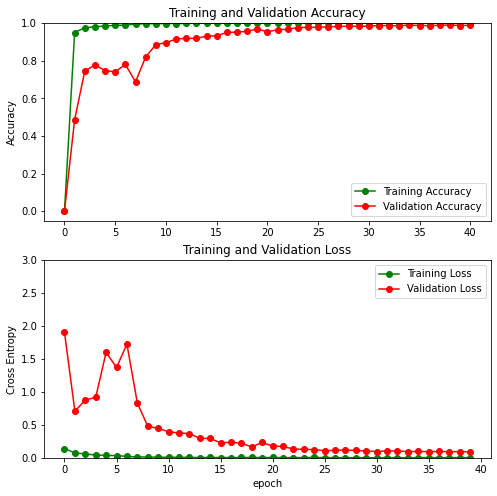

Found 1894 validated image filenames.
Model Accuracy: 98.47%
Correct Predictions: 1865 Total Predictions: 1894

Normal Predictions: 292 Accuracy 95.11%
Covid Predictions: 733 Accuracy 99.86%
Pneumonia Predictions: 840 Accuracy 98.48%


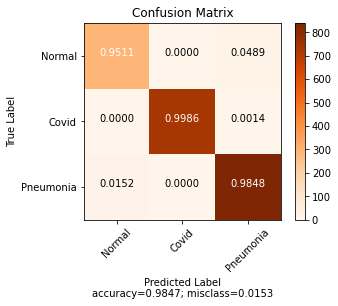

              precision    recall  f1-score   support

      Normal       0.96      0.95      0.95       307
       Covid       1.00      1.00      1.00       734
   Pneumonia       0.98      0.98      0.98       853

    accuracy                           0.98      1894
   macro avg       0.98      0.98      0.98      1894
weighted avg       0.98      0.98      0.98      1894

Precision: 0.9795618201317605
Recall: 0.9781791130243974
F1 : 0.978865905014203
[[292   0  15]
 [  0 733   1]
 [ 13   0 840]]
Found 5683 validated image filenames belonging to 3 classes.
Found 1895 validated image filenames belonging to 3 classes.
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/40
178/178 [==============================] - 268s 1s/step - loss: 0.1517 - accuracy: 0.9402 - val_loss: 0.4371 - val_accuracy: 0.8259

Epoch 00001: val_loss improved from inf to 0.43707, saving model to /home/sch17/Documents/fyp/notebooks/MobileNet/output/MobileNet

/home/sch17/anaconda3/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/40
178/178 [==============================] - 259s 1s/step - loss: 0.0771 - accuracy: 0.9725 - val_loss: 0.2524 - val_accuracy: 0.9024

Epoch 00002: val_loss improved from 0.43707 to 0.25240, saving model to /home/sch17/Documents/fyp/notebooks/MobileNet/output/MobileNetV2_dasa_%28V9a%29_kcross_0.h5
Epoch 3/40
178/178 [==============================] - 260s 1s/step - loss: 0.0517 - accuracy: 0.9824 - val_loss: 0.3677 - val_accuracy: 0.8939

Epoch 00003: val_loss did not improve from 0.25240
Epoch 4/40
178/178 [==============================] - 259s 1s/step - loss: 0.0446 - accuracy: 0.9847 - val_loss: 0.2324 - val_accuracy: 0.9293

Epoch 00004: val_loss improved from 0.25240 to 0.23243, saving model to /home/sch17/Documents/fyp/notebooks/MobileNet/output/MobileNetV2_dasa_%28V9a%29_kcross_0.h5
Epoch 5/40
178/178 [==============================] - 260s 1s/step - loss: 0.0353 - accuracy: 0.9887 - val_loss: 0.8993 - val_accuracy: 0.8723

Epoch 00005: val_loss did not improve from 0.

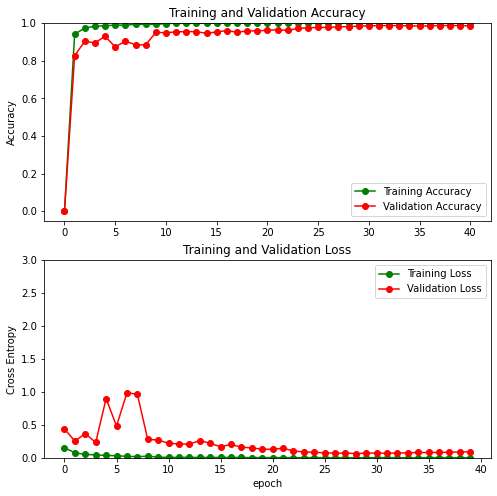

Found 1894 validated image filenames.
Model Accuracy: 98.89%
Correct Predictions: 1873 Total Predictions: 1894

Normal Predictions: 294 Accuracy 96.39%
Covid Predictions: 758 Accuracy 99.87%
Pneumonia Predictions: 821 Accuracy 98.92%


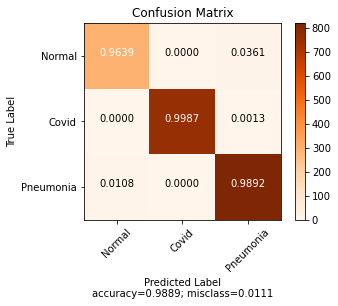

              precision    recall  f1-score   support

      Normal       0.97      0.96      0.97       305
       Covid       1.00      1.00      1.00       759
   Pneumonia       0.99      0.99      0.99       830

    accuracy                           0.99      1894
   macro avg       0.99      0.98      0.98      1894
weighted avg       0.99      0.99      0.99      1894

Precision: 0.9852970891326828
Recall: 0.9839245098929595
F1 : 0.9846060954194291
[[294   0  11]
 [  0 758   1]
 [  9   0 821]]
Found 5683 validated image filenames belonging to 3 classes.
Found 1895 validated image filenames belonging to 3 classes.
------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/40
178/178 [==============================] - 269s 1s/step - loss: 0.1388 - accuracy: 0.9560 - val_loss: 0.3296 - val_accuracy: 0.8454

Epoch 00001: val_loss improved from inf to 0.32959, saving model to /home/sch17/Documents/fyp/notebooks/MobileNet/output/MobileNe

/home/sch17/anaconda3/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/40
178/178 [==============================] - 259s 1s/step - loss: 0.0720 - accuracy: 0.9740 - val_loss: 0.4252 - val_accuracy: 0.8359

Epoch 00002: val_loss did not improve from 0.32959
Epoch 3/40
178/178 [==============================] - 260s 1s/step - loss: 0.0544 - accuracy: 0.9808 - val_loss: 0.9795 - val_accuracy: 0.7799

Epoch 00003: val_loss did not improve from 0.32959
Epoch 4/40
178/178 [==============================] - 260s 1s/step - loss: 0.0460 - accuracy: 0.9835 - val_loss: 0.9060 - val_accuracy: 0.8116

Epoch 00004: val_loss did not improve from 0.32959
Epoch 5/40
178/178 [==============================] - 260s 1s/step - loss: 0.0354 - accuracy: 0.9889 - val_loss: 0.6440 - val_accuracy: 0.8591

Epoch 00005: val_loss did not improve from 0.32959
Epoch 6/40
178/178 [==============================] - 260s 1s/step - loss: 0.0306 - accuracy: 0.9905 - val_loss: 0.4483 - val_accuracy: 0.8934

Epoch 00006: val_loss did not improve from 0.32959

Epoch 00006: ReduceLROnP

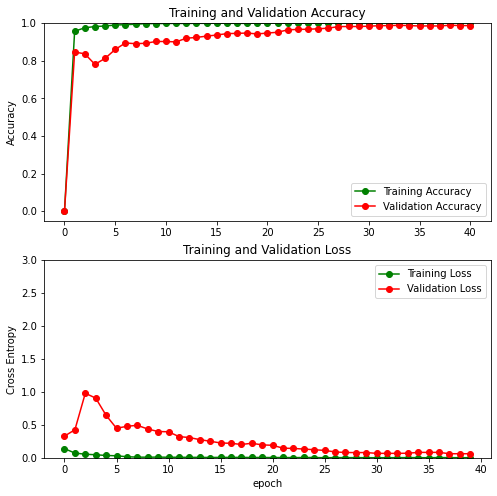

Found 1894 validated image filenames.
Model Accuracy: 98.47%
Correct Predictions: 1865 Total Predictions: 1894

Normal Predictions: 305 Accuracy 95.02%
Covid Predictions: 697 Accuracy 100.00%
Pneumonia Predictions: 863 Accuracy 98.52%


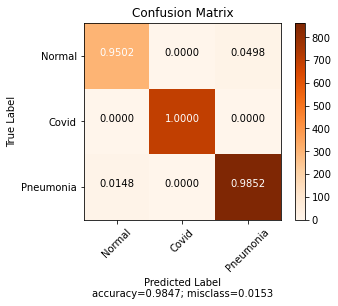

              precision    recall  f1-score   support

      Normal       0.96      0.95      0.95       321
       Covid       1.00      1.00      1.00       697
   Pneumonia       0.98      0.99      0.98       876

    accuracy                           0.98      1894
   macro avg       0.98      0.98      0.98      1894
weighted avg       0.98      0.98      0.98      1894

Precision: 0.9803056646704017
Recall: 0.9784385268638246
F1 : 0.9793641239650629
[[305   0  16]
 [  0 697   0]
 [ 13   0 863]]
[98.36411609498681, 98.46965699208442, 98.46884899683211, 98.89123548046463, 98.46884899683211]
average accuracy =  98.53254131224


In [ ]:
from sklearn.model_selection import KFold

fold_no = 1
batch_size = 32
epochs = 40

acc_per_fold = []
perf_per_fold = []

inputs = df['filename']
targets = df['category']

# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

for train, test in kfold.split(inputs, targets):
  init_model = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top=False, input_shape=input_shape)
  x = init_model.output
  x = tfl.GlobalAveragePooling2D()(x)
  x = tfl.Dropout(0.2)(x)
  x= tfl.Dense(64, activation='relu')(x) #64 units
  x= tfl.Dense(256, activation='relu')(x) #256 units
  x = tfl.Dense(3, activation='softmax')(x) # 3 units
  model = Model(inputs=init_model.input, outputs=x)

  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate= 0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
  
  ##Separate Training Data
  categories = []
  
  for img in inputs[train]:

      fileName = img.split('.')[0]

      if 'normal' in fileName: categories.append(0)
      elif 'covid' in fileName: categories.append(1)
      else: categories.append(2)

  cross_val_df = pd.DataFrame ({
      'filename': inputs[train],
      'category': categories
  })
  
  cross_val_df["category"] = cross_val_df["category"].replace({0: 'Normal', 1: 'Covid', 2:'Pneumonia'})
  
  train_df, validate_df = train_test_split(cross_val_df, test_size=0.25)
  train_df = train_df.reset_index(drop=True)
  validate_df = validate_df.reset_index(drop=True)

  train_generator = ImageDataGenerator(
      rescale=1./255,
      width_shift_range = 0.1,
      height_shift_range = 0.1
      ).flow_from_dataframe (
        train_df, 
        x_col = 'filename',
        y_col = 'category',
        target_size = IMAGE_SIZE,
        class_mode = 'categorical',
        batch_size = batch_size
    )
  
  validation_generator = ImageDataGenerator(rescale=1./255).flow_from_dataframe (
        validate_df, 
        x_col ='filename',
        y_col = 'category',
        target_size = IMAGE_SIZE,
        class_mode = 'categorical',
        batch_size = batch_size
    )
  
  
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  
  model_checkpoint = ModelCheckpoint(save_model_path + '_' + str(fold_no) +".h5", save_best_only=True, verbose=1)
  reduce_lr = ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1)

  history = model.fit(train_generator,
                    validation_data=validation_generator, 
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[model_checkpoint, reduce_lr])
  
  model.save(save_model_path + '_' + str(fold_no) +".h5") # save path
  filename = save_history_path+"history" + str(fold_no) +".npy"
  np.save(filename,history.history)

  plot_graphs(history)

  ##Separate Testing Data
  test_filenames = []
    
  for img in inputs[test]:

      test_filenames.append(img)
      
  test_df = pd.DataFrame({
      'filename': test_filenames
  })
  
  nb_samples = test_df.shape[0]

  test_generator = ImageDataGenerator(rescale = 1./255).flow_from_dataframe(
      test_df, 
      x_col = 'filename',
      y_col = None,
      class_mode = None,
      target_size = IMAGE_SIZE,
      batch_size = batch_size,
      shuffle = False
  )

  #Get Test Data Predictions 
  predict = model.predict(test_generator, steps=np.ceil(nb_samples/batch_size))

  # print("predict================================================================")
  # print(predict)
  # print("done================================================================")

  test_df['category'] = np.argmax(predict, axis=-1)
  label_map = dict((v,k) for k,v in train_generator.class_indices.items())
  test_df['category'] = test_df['category'].replace(label_map)
  test_df['category'] = test_df['category'].replace({'Normal': 0, 'Covid': 1, 'Pneumonia': 2})

  actual = []
  pred = []

  for row in test_df.iterrows():

      filename = row[1][0]

      if 'normal' in filename: actual.append(0)
      if 'covid' in filename: actual.append(1)
      if 'pneumonia' in filename: actual.append(2)
      pred.append(row[1][1])


  fold_no = fold_no + 1

  # Get performance metrics  
  accuracy = getModelAccuracy(test_df)
  acc_per_fold.append(accuracy)
  perf_per_fold.append([actual, pred])

  cf = confusion_matrix(actual, pred)

  # print("##############################printing cf#################################")
  # print(cf)
  # print(type(cf))
  # print("##############################done#################################")

    
  target_names = ['Normal','Covid', 'Pneumonia']
  plot_confusion_matrix(cf, target_names)

  print(classification_report(actual, pred, target_names=target_names))  
  # break
  # if(fold_no==4):
  
  # calculate precision
  precision = precision_score(actual, pred,  average='macro')
  print('Precision:', precision)

  # calculate recall
  recall = recall_score(actual, pred,  average='macro')
  print('Recall:', recall)

  # f1
  # f1 =  2 * (precision * recall) / (precision + recall)
  f1 = f1_score(actual, pred,  average='macro')
  print ("F1 :", f1)

  print(confusion_matrix(actual, pred))
print(acc_per_fold)
print("average accuracy = ",sum(acc_per_fold)/5)

In [ ]:
plt.figure(figsize=(10, 10))
batch=next(train_generator)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels

for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  img=batch[0][i]
  plt.title(batch[1][i])
  plt.imshow(img)  

# Saved model

In [ ]:
loaded_model = tf.keras.models.load_model(save_model_path)











































































































# predict

In [ ]:
pre_test_df = test_df

In [ ]:
batch_size = 32
nb_samples = test_df.shape[0]

In [ ]:
test_generator = ImageDataGenerator(rescale = 1./255).flow_from_dataframe(
    test_df, 
    x_col = 'filename',
    y_col = None,
    class_mode = None,
    target_size = IMAGE_SIZE,
    batch_size = batch_size,
    shuffle = False
)

In [ ]:
predict = loaded_model.predict(test_generator_eval, steps = np.ceil(nb_samples/batch_size))


In [ ]:
test_df['category'] = np.argmax(predict, axis=-1)

In [ ]:
sample_test = test_df.head(18)
sample_test.head()

# Calculate Model Accuracy

In [ ]:
sample_test = test_df
correctPredictions = 0

correctNormalPred = 0
correctCovidPred = 0
correctPneuPred = 0

totalNormalPred = 0
totalCovidPred = 0
totalPneuPred = 0

for index, row in sample_test.iterrows():
    
    filename = row['filename']
    prediction = row['category']
    
    img = load_img( filename, target_size=IMAGE_SIZE)
    
    if 'normal' in filename:
        
        if prediction == 0:
            correctPredictions += 1
            correctNormalPred += 1
            
        totalNormalPred += 1
    
    if 'covid' in filename:
        if prediction == 1: 
            correctPredictions += 1
            correctCovidPred += 1
            
        totalCovidPred += 1
    
    if 'pneumonia' in filename:
        
        if prediction == 2: 
            correctPredictions += 1
            correctPneuPred += 1
            
        totalPneuPred += 1

In [ ]:
print('Model Accuracy:', "{:.2%}".format(correctPredictions / test_df.shape[0]))
print('Correct Predictions:', correctPredictions, 'Total Predictions:', test_df.shape[0])

print('\nNormal Predictions:', correctNormalPred, 'Accuracy', "{:.2%}".format(correctNormalPred /  totalNormalPred))
print('COVID-19 Predictions:', correctCovidPred, 'Accuracy', "{:.2%}".format(correctCovidPred /  totalCovidPred))
print('Viral Pneumonia Predictions:', correctPneuPred, 'Accuracy', "{:.2%}".format(correctPneuPred / totalPneuPred))

In [ ]:
actual = []
pred = []

for row in test_df.iterrows():
    
    filename = row[1][0]
    
    if 'normal' in filename: actual.append(0)
    if 'covid' in filename: actual.append(1)
    if 'pneumonia' in filename: actual.append(2)
        
    pred.append(row[1][1])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(actual, pred))  

In [ ]:
confusion_matrix(actual, pred)

# Predict single

In [ ]:
batch_size = 1
nb_samples = 1

In [ ]:
test_file = []
df_file = pd.DataFrame({
    'filename': test_file
})

In [ ]:
df_file

In [ ]:
test_single_gen = ImageDataGenerator(rescale = 1./255).flow_from_dataframe(
    df_file, 
    x_col = 'filename',
    y_col = None,
    class_mode = None,
    target_size = IMAGE_SIZE,
    batch_size = batch_size,
    shuffle = False
)

In [ ]:
predict = loaded_model.predict(test_single_gen, steps = np.ceil(nb_samples/batch_size))

In [ ]:
df_file['category'] = np.argmax(predict, axis=-1)

In [ ]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
df_file['category'] = df_file['category'].replace(label_map)

In [ ]:
# df_file['category'] = df_file['category'].replace({'Normal': 0, 'Covid': 1, 'Pneumonia': 2})

In [ ]:
df_file